In [1]:
import numpy as np

In [2]:
a = np.array([1,2,4,2,3,1,4,5,7,2,3,1,3,5,1])

In [3]:
a_un, b, c = np.unique(a, return_counts=True, return_inverse=True)

In [4]:
a_un

array([1, 2, 3, 4, 5, 7])

In [6]:
c[b]

array([4, 3, 2, 3, 3, 4, 2, 2, 1, 3, 3, 4, 3, 2, 4])

In [7]:
a

array([1, 2, 4, 2, 3, 1, 4, 5, 7, 2, 3, 1, 3, 5, 1])

In [12]:
c_inv = c[b]

In [14]:
c_inv

array([4, 3, 2, 3, 3, 4, 2, 2, 1, 3, 3, 4, 3, 2, 4])

In [16]:
c_inv[c_inv>2]

array([4, 3, 3, 3, 4, 3, 3, 4, 3, 4])

In [17]:
c_inv>2

array([ True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True])

In [18]:
a = np.zeros(np.size(c_inv))

In [19]:
a[c_inv>2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
a = [1,2,3,4]
a.len()

AttributeError: 'list' object has no attribute 'len'

In [7]:
from torch_geometric.data import InMemoryDataset
import torch
from dataset_wl import dataset_gen

In [8]:
class QM9_reduct(InMemoryDataset):
    def __init__(self, root, num_it, batch_size, 
                 transform=None, pre_transform=None, pre_filter=None):
        self.num_it = num_it
        self.batch_size = batch_size
        super().__init__(root, transform, pre_transform, pre_filter)  
        self.data, self.slices = torch.load(self.processed_paths[0])
    
    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        _, _, self.num_classes, data_list = dataset_gen(self.num_it, 'QM9', self.batch_size)
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0]) 


In [11]:
num_it = 4
QM9_reduct('./data/QM9_'+str(num_it)+'/',num_it,16)

QM9_reduct(205)

In [12]:
a = QM9_reduct('./data/QM9_'+str(num_it)+'/',num_it,16)

In [9]:
hidden_size = 16
num_layers = 4
batch_size = 64
threshold = 40

dataset = './data/QM9_IT'+str(num_layers)+'_THR'+str(threshold)+'/'

In [4]:
dataset

'./data/QM9_IT4_THR40/'

In [10]:
from dataset_wl import dataloader_gen
train_loader, num_features, num_classes = dataloader_gen(dataset, num_layers, batch_size, threshold)
  

In [11]:
num_classes

9

<Axes: ylabel='age'>

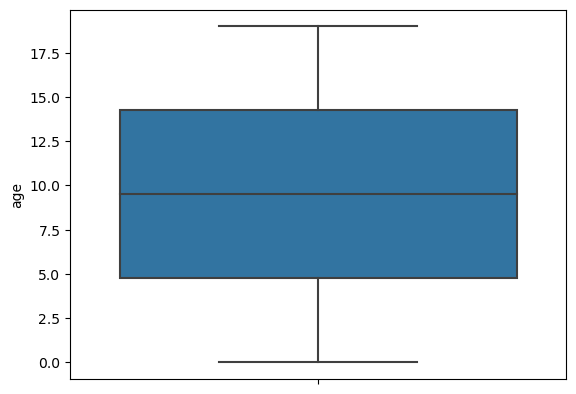

In [7]:
import seaborn as sns
import pandas as pd
a = []
for i in range(20):
    a.append({'age':i})
box = pd.DataFrame(a)
sns.boxplot(y=box['age'])


In [2]:
num_layers = 4
threshold = 45
dataset = './data/QM9_IT'+str(num_layers)+'_THR'+str(threshold)+'/' 

In [5]:
from dataset_wl import dataset_gen, dataloader_gen, trial_loader
batch_size = 64
train_loader, num_features, num_classes = dataloader_gen(dataset, num_layers, batch_size, threshold)     


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset_wl import QM9_reduct
from matplotlib.ticker import MultipleLocator

In [15]:
data = pd.read_csv('train_acc_data_IT4.csv')
data = data[['correct','threshold','hidden_size','it']]

In [5]:
data

,correct,threshold,hidden_size,it
0,100.000000,45,16,0
1,100.000000,45,16,1
2,100.000000,45,16,2
3,100.000000,45,16,3
4,100.000000,45,16,4
...,...,...,...,...
235,100.000000,30,16,10
236,93.492063,30,16,11
237,100.000000,30,16,12
238,81.587302,30,16,13


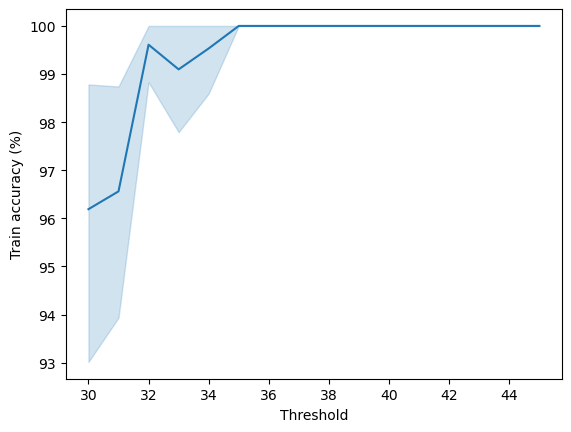

In [33]:
sns.lineplot(data, x='threshold',y = 'correct')
plt.xlabel('Threshold')
plt.ylabel('Train accuracy (%)')
plt.savefig('threshold_plot.pdf')

In [78]:
batch_size = 64
num_it = 4
num_layers = num_it
num_col_list = []
card_list = []
for threshold in range(30,46):
    dataset_name = './data/QM9_IT'+str(num_layers)+'_THR'+str(threshold)+'/'  
    dataset = QM9_reduct(dataset_name, num_it, batch_size, threshold)
    data.loc[data['threshold'] == threshold, 'card'] = int(dataset.len())
    card_list.append(int(dataset.len()))
    data.loc[data['threshold'] == threshold, 'num_colors'] = int(dataset.num_classes)
    num_col_list.append(dataset.num_classes)
    #verify that in at least one experiment for each threshold, 100% is reached
    print(max(data[data['threshold']==threshold]['correct']))
data.to_csv('train_acc_data_IT4_new.csv')

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0


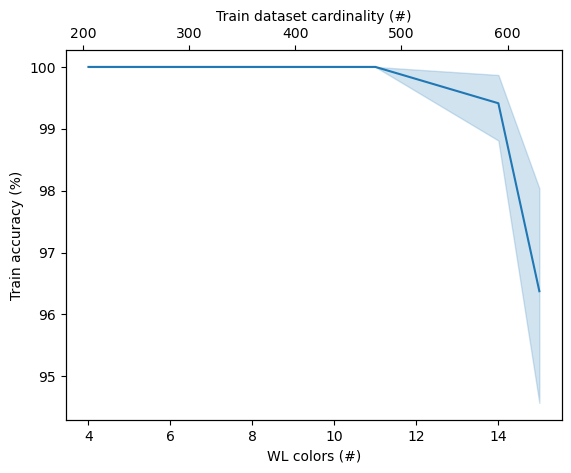

In [77]:
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(data, x='num_colors',y = 'correct')
# plt.xlim(30, 45)
# ax.xaxis.set_major_locator(MultipleLocator(200))
ax.set_xlabel('WL colors (#)')
ax.set_ylabel('Train accuracy (%)')
ax2 = ax.twiny()
sns.lineplot(data, x='card',y='correct', errorbar=None, visible=False)
ax2.set_xlabel('Train dataset cardinality (#)')
# ax3 = ax.twiny()
# sns.lineplot(data, x='threshold', y='correct', errorbar=None, visible=False)
# ax3.xaxis.set_major_locator(MultipleLocator(4))
# #ax2.set_xticks(card_list)
# # plt.xlim(200, 700)
# # ax2.xaxis.set_major_locator(MultipleLocator(400))
# ax3.spines['top'].set_position(('axes', -0.15))
# ax3.spines['top'].set_visible(False)
# plt.tick_params(which='both', top=False)
plt.savefig('colors2_plot.pdf')

In [80]:

batch_size = 64
hidden_size_list = [4,8,16,32,64]
threshold= 35
num_it = 4
num_col_list = []
card_list = []
data = pd.read_csv('train_acc_data_THR35.csv')
data = data[['correct','threshold','hidden_size','it']]
for hidden_size in hidden_size_list:
    num_layers = num_it
    dataset_name = './data/QM9_IT'+str(num_layers)+'_THR'+str(threshold)+'/'  
    dataset = QM9_reduct(dataset_name, num_it, batch_size, threshold)
    data.loc[data['threshold'] == threshold, 'card'] = int(dataset.len())
    card_list.append(int(dataset.len()))
    data.loc[data['threshold'] == threshold, 'num_colors'] = int(dataset.num_classes)
    num_col_list.append(dataset.num_classes)
    #verify that in at least one experiment for each threshold, 100% is reached
    print(max(data[data['threshold']==threshold]['correct']))
data.to_csv('train_acc_data_THR35_new.csv')

100.0
100.0
100.0
100.0
100.0


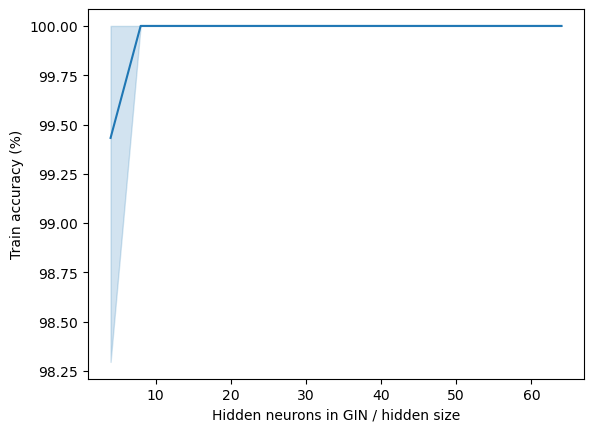

In [85]:
sns.lineplot(data, x='hidden_size', y = 'correct')
plt.xlabel('Hidden neurons in GIN / hidden size')
plt.ylabel('Train accuracy (%)')
plt.savefig('hidden_plot.pdf',bbox_inches='tight')